# Lab 1

## Dataset

[https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis](https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis)

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## TASK 1: Load data, display column names and dataset size

In [2]:
data = pd.read_csv("./parkinsons_disease_data.csv", sep=',')
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


### Delete PatientID column and DoctorInCharge (useless)

In [3]:
data = data.drop('PatientID', axis=1)
data = data.drop('DoctorInCharge', axis=1)

In [4]:
data.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension',
       'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis'],
      dtype='object')

In [5]:
feature_names = list(data.columns)
feature_names.remove('Diagnosis')

In [6]:
categorial_features = ['Gender', 'Ethnicity', 'EducationLevel','Smoking','FamilyHistoryParkinsons','TraumaticBrainInjury','Hypertension','Diabetes','Depression','Stroke',
            'Tremor','Rigidity','Bradykinesia','PosturalInstability','SpeechProblems','SleepDisorders','Constipation','Diagnosis']
print(categorial_features)
print(f"Number of categorial_features: {len(categorial_features)}")

['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']
Number of categorial_features: 18


In [7]:
numerical_features = list(set(feature_names) - set(categorial_features))
print(numerical_features)
print(f"Number of categorial_features: {len(numerical_features)}")

['MoCA', 'CholesterolHDL', 'PhysicalActivity', 'CholesterolLDL', 'CholesterolTriglycerides', 'FunctionalAssessment', 'Age', 'AlcoholConsumption', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'DietQuality', 'UPDRS', 'BMI', 'CholesterolTotal']
Number of categorial_features: 15


In [8]:
data.shape

(2105, 33)

### Other info

#### Dataset column info

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2105 non-null   int64  
 1   Gender                    2105 non-null   int64  
 2   Ethnicity                 2105 non-null   int64  
 3   EducationLevel            2105 non-null   int64  
 4   BMI                       2105 non-null   float64
 5   Smoking                   2105 non-null   int64  
 6   AlcoholConsumption        2105 non-null   float64
 7   PhysicalActivity          2105 non-null   float64
 8   DietQuality               2105 non-null   float64
 9   SleepQuality              2105 non-null   float64
 10  FamilyHistoryParkinsons   2105 non-null   int64  
 11  TraumaticBrainInjury      2105 non-null   int64  
 12  Hypertension              2105 non-null   int64  
 13  Diabetes                  2105 non-null   int64  
 14  Depressi

> All column is numbers, no encoding needed

#### Dataset statistics

In [10]:
data.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,6.996639,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,1.753065,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,4.000497,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,5.488864,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,6.929819,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,8.558719,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,9.999821,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## TASK 2: Process gaps in the data

### Number of gaps

In [11]:
data.isnull().sum()

Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis                   0
dtype: int

> No gaps found!

## TASK 3.1: Display correlation heatmap

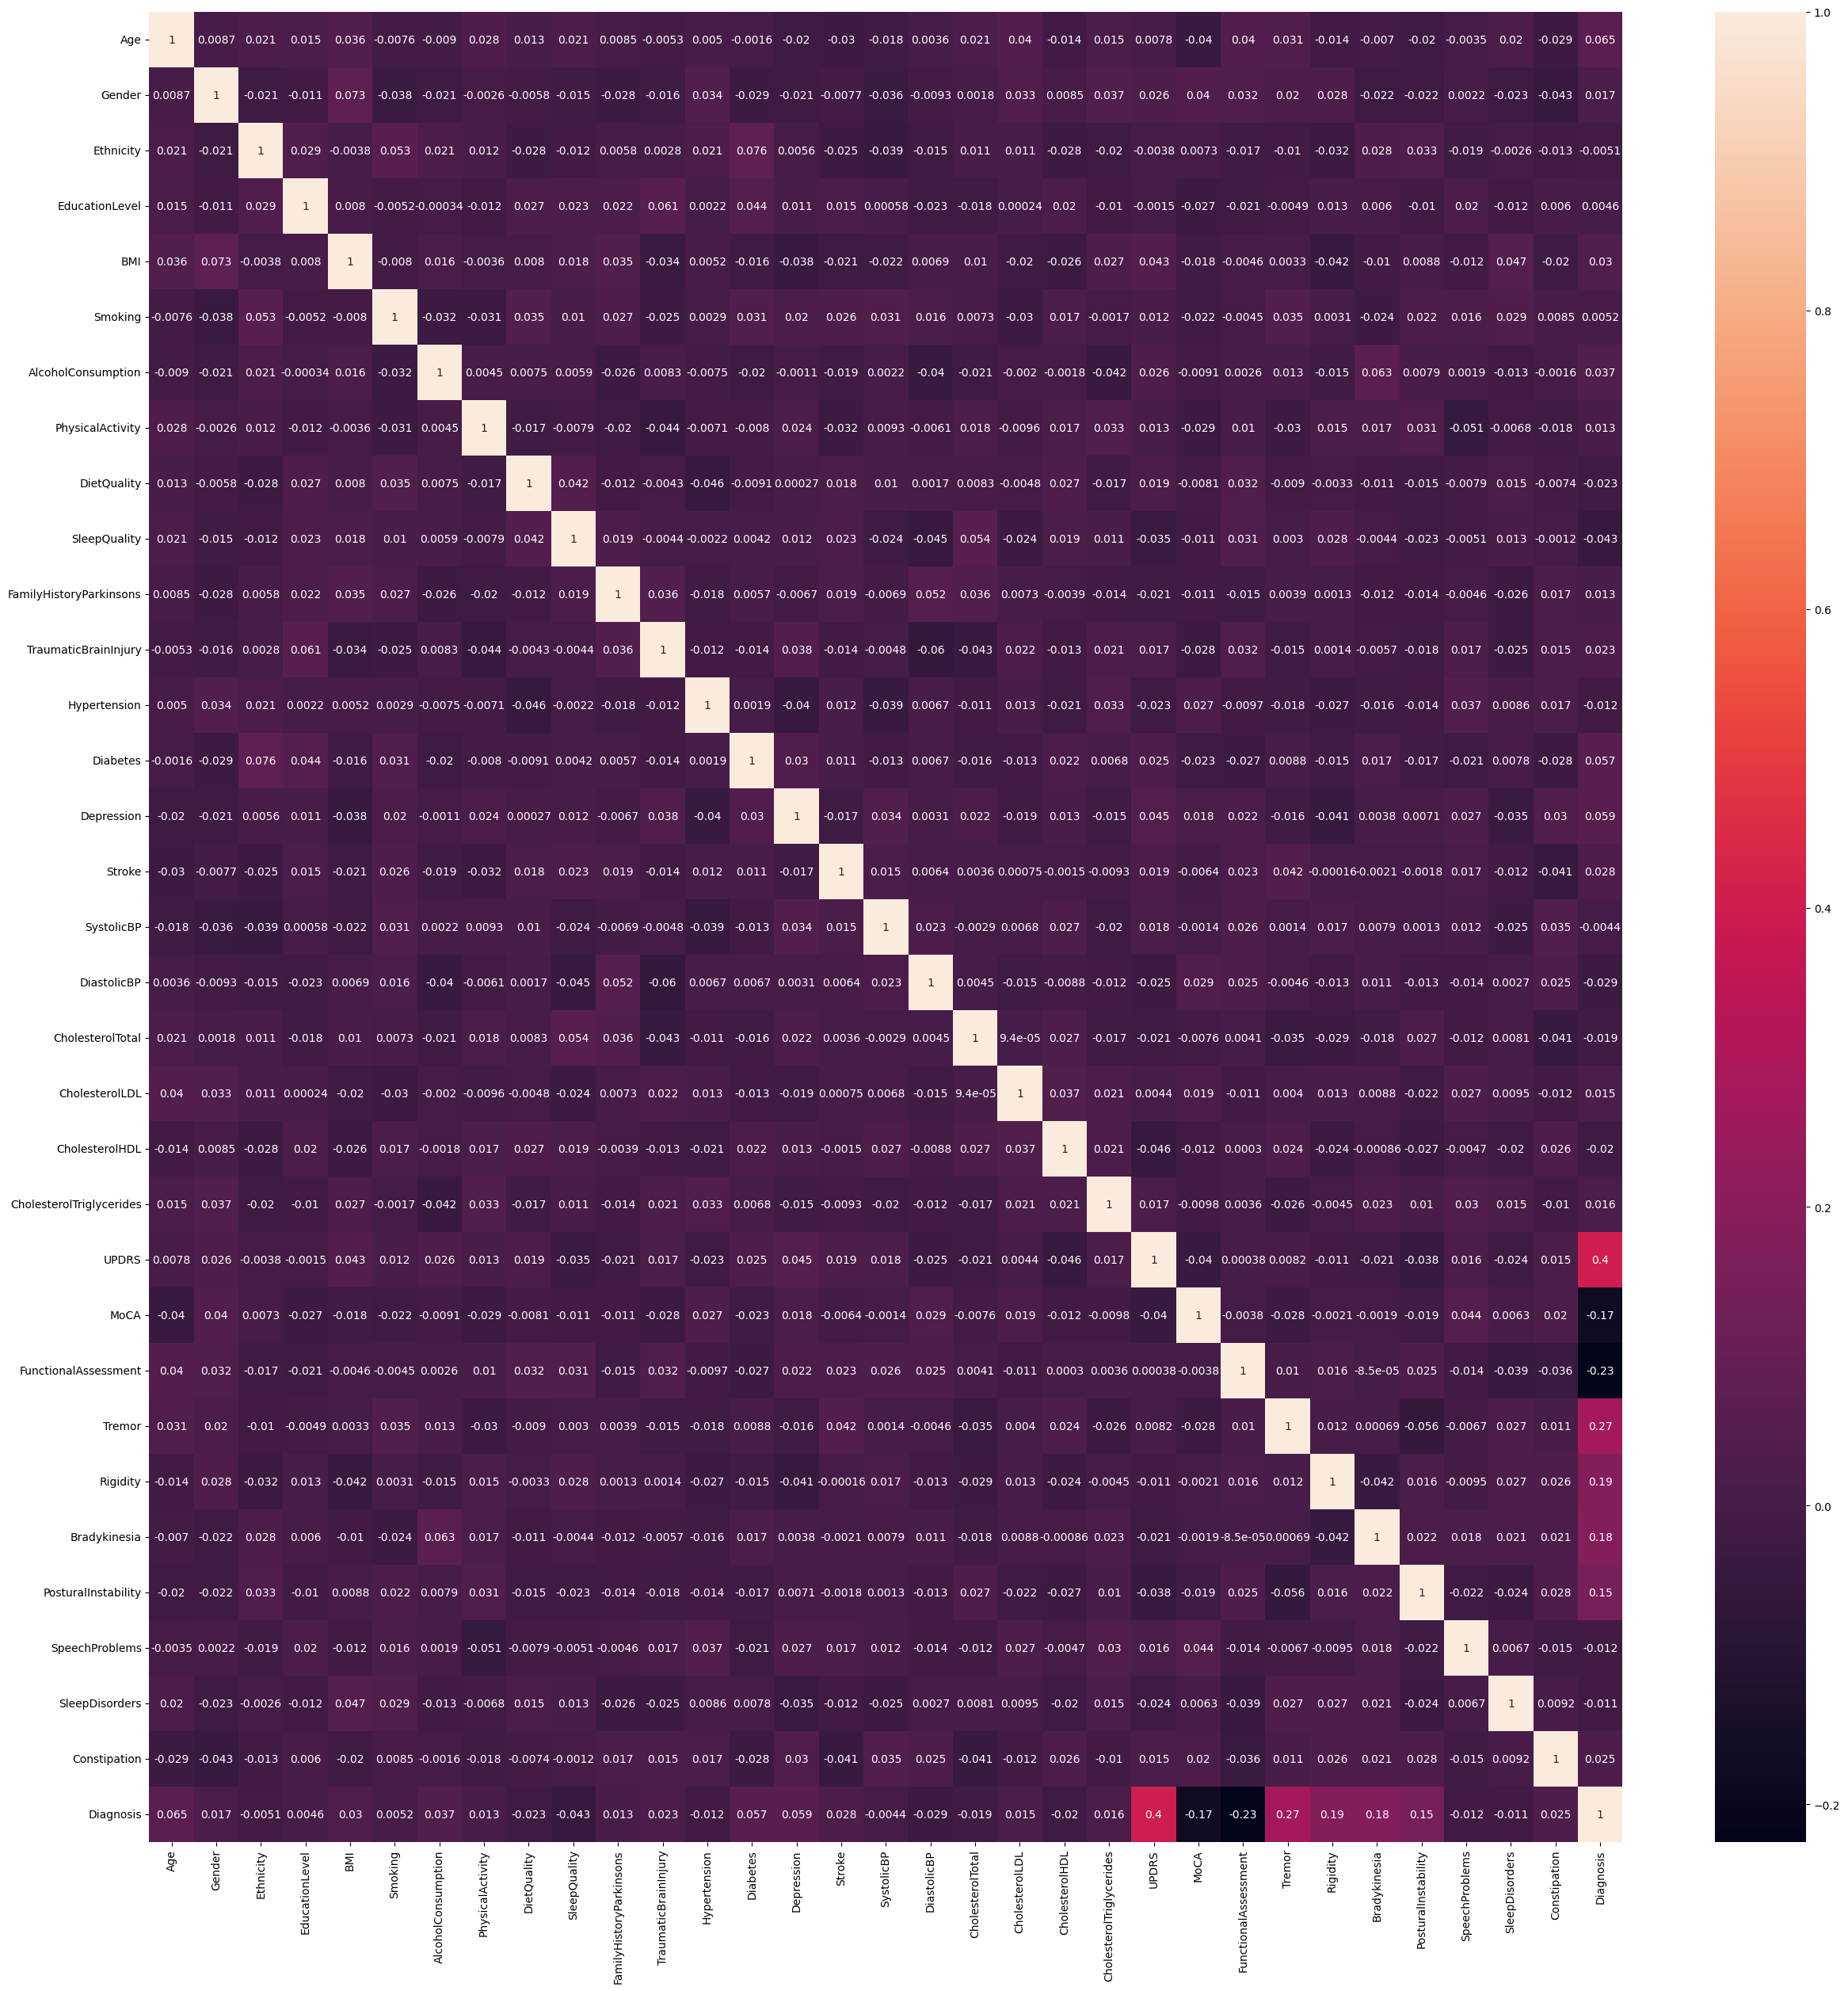

In [12]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)
plt.show()

## TASK 3.2: Display histograms

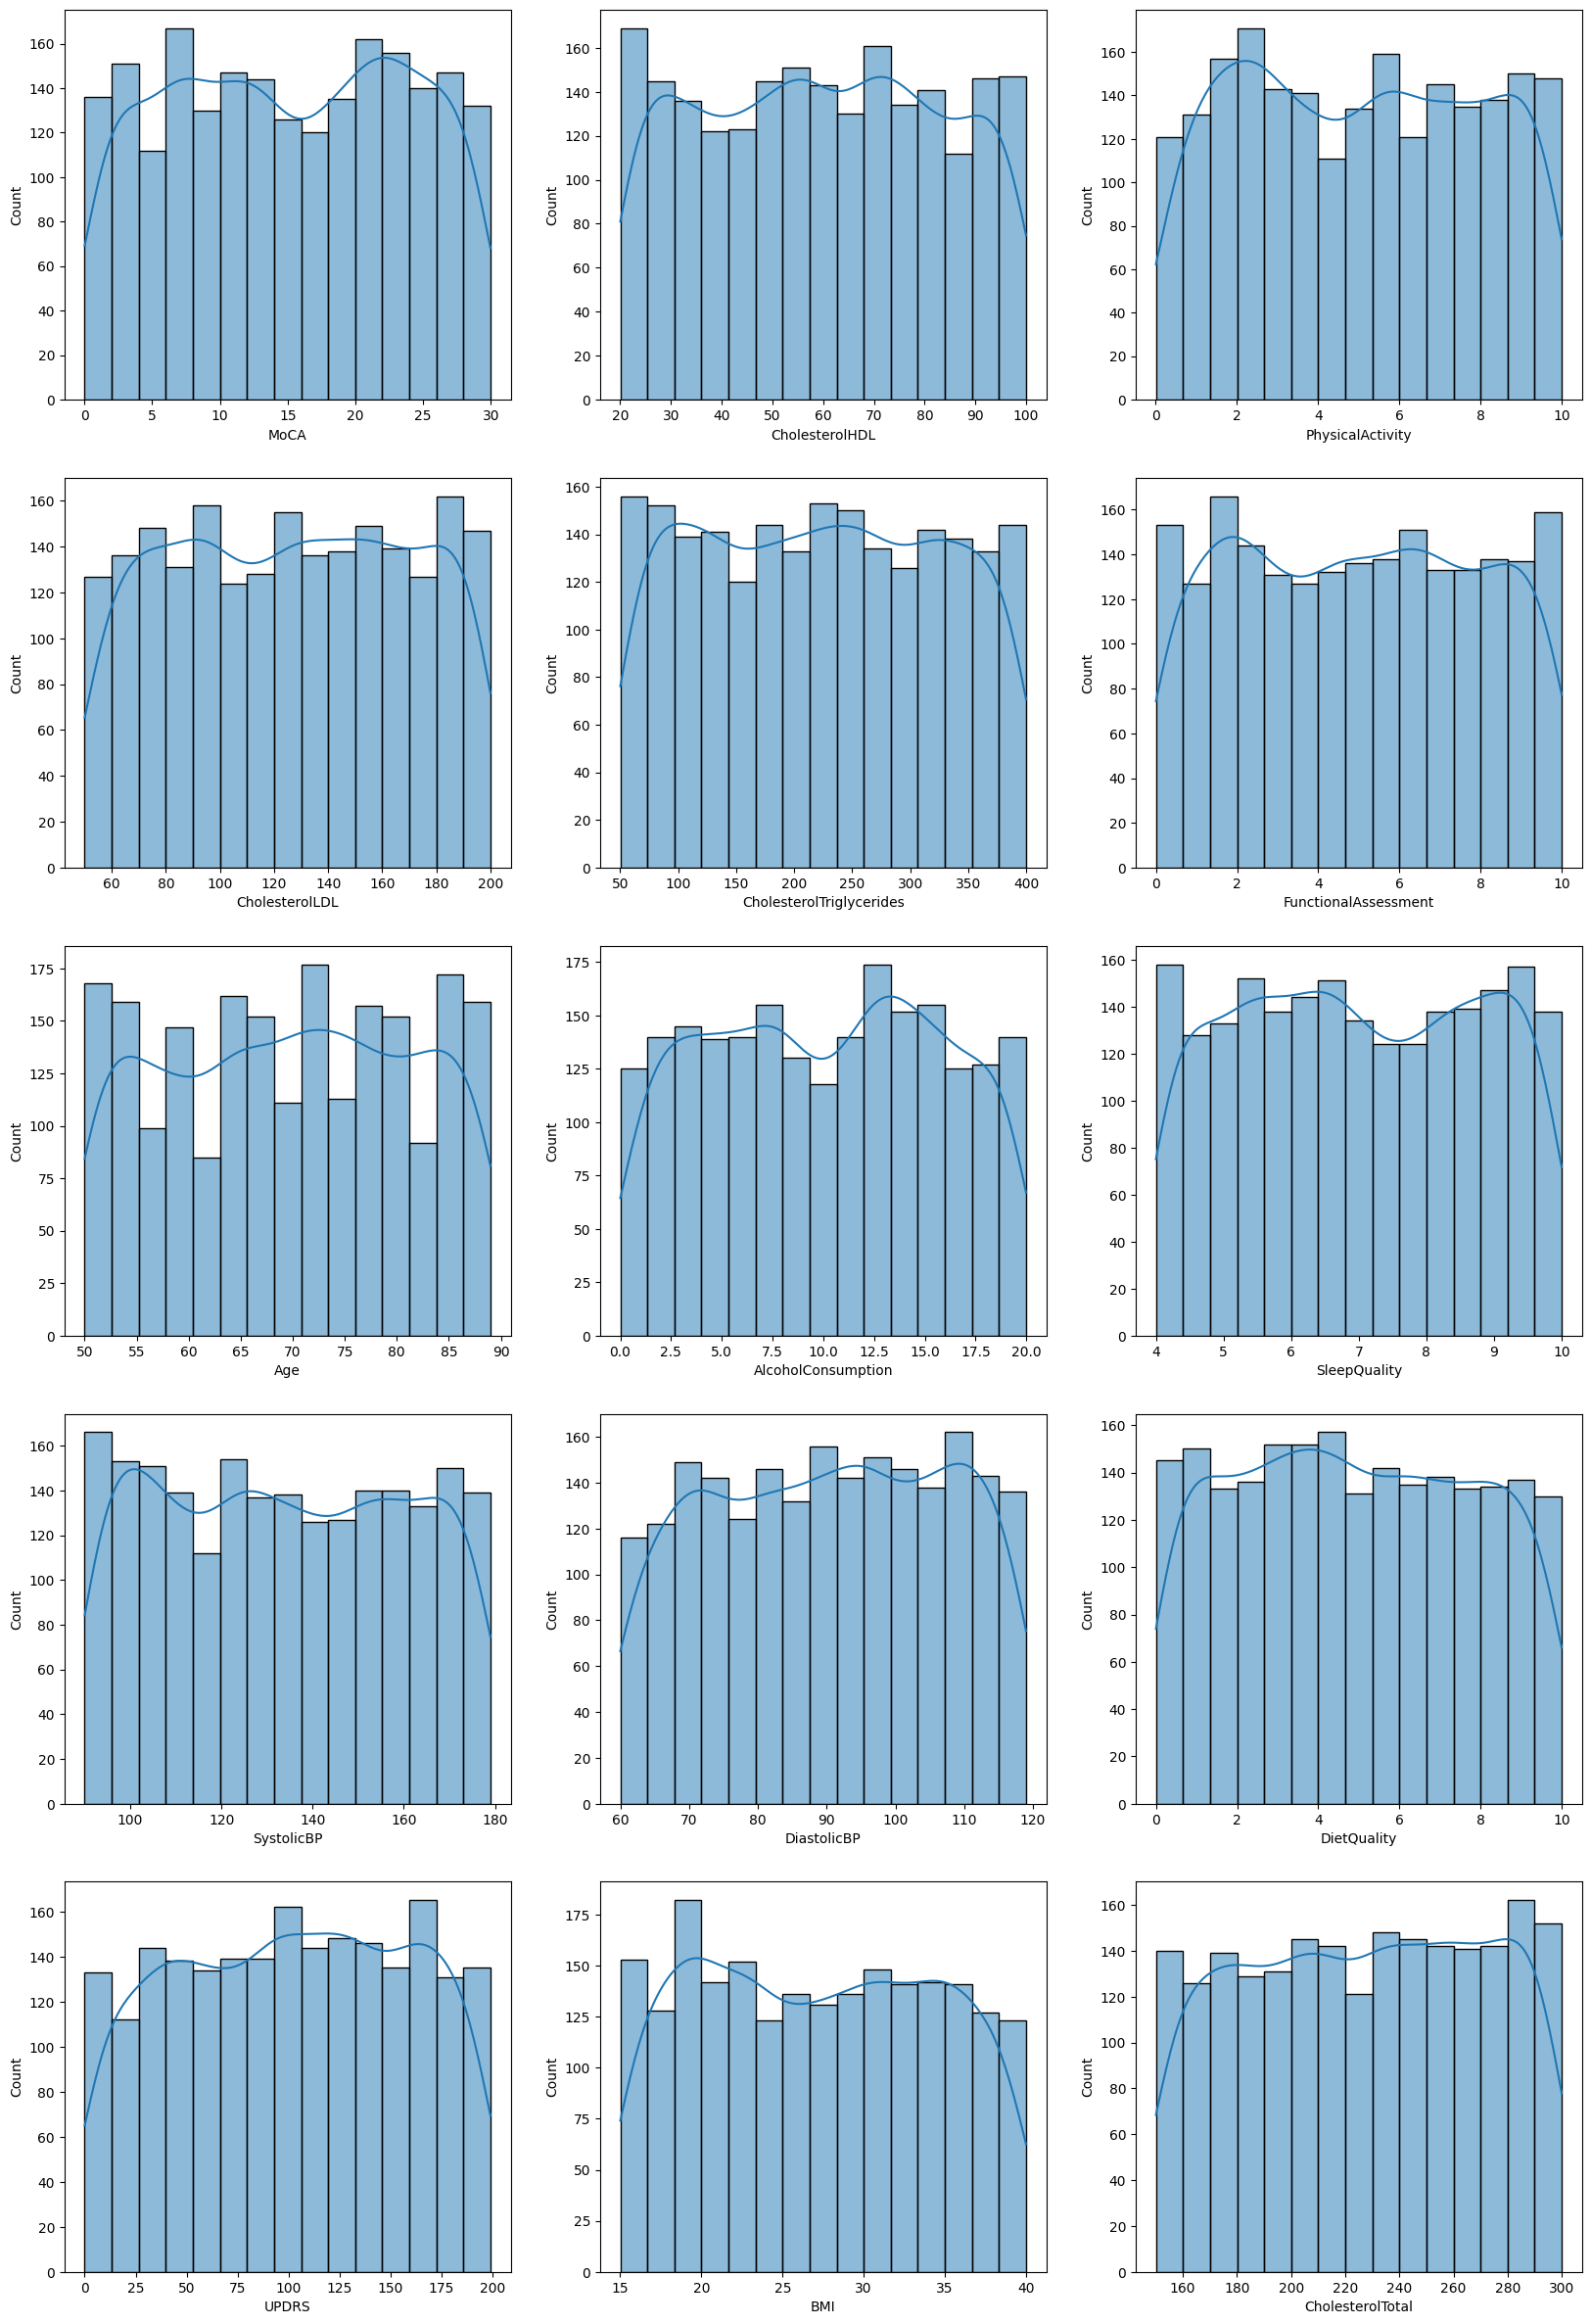

In [13]:
fig, axes = plt.subplots(5, 3, figsize=(20, 30))
axes = axes.flatten()

for i in range(len(numerical_features)):
    sns.histplot(data[numerical_features[i]], bins=15, kde=True, ax=axes[i])

## TASK 3.3: Display boxplots

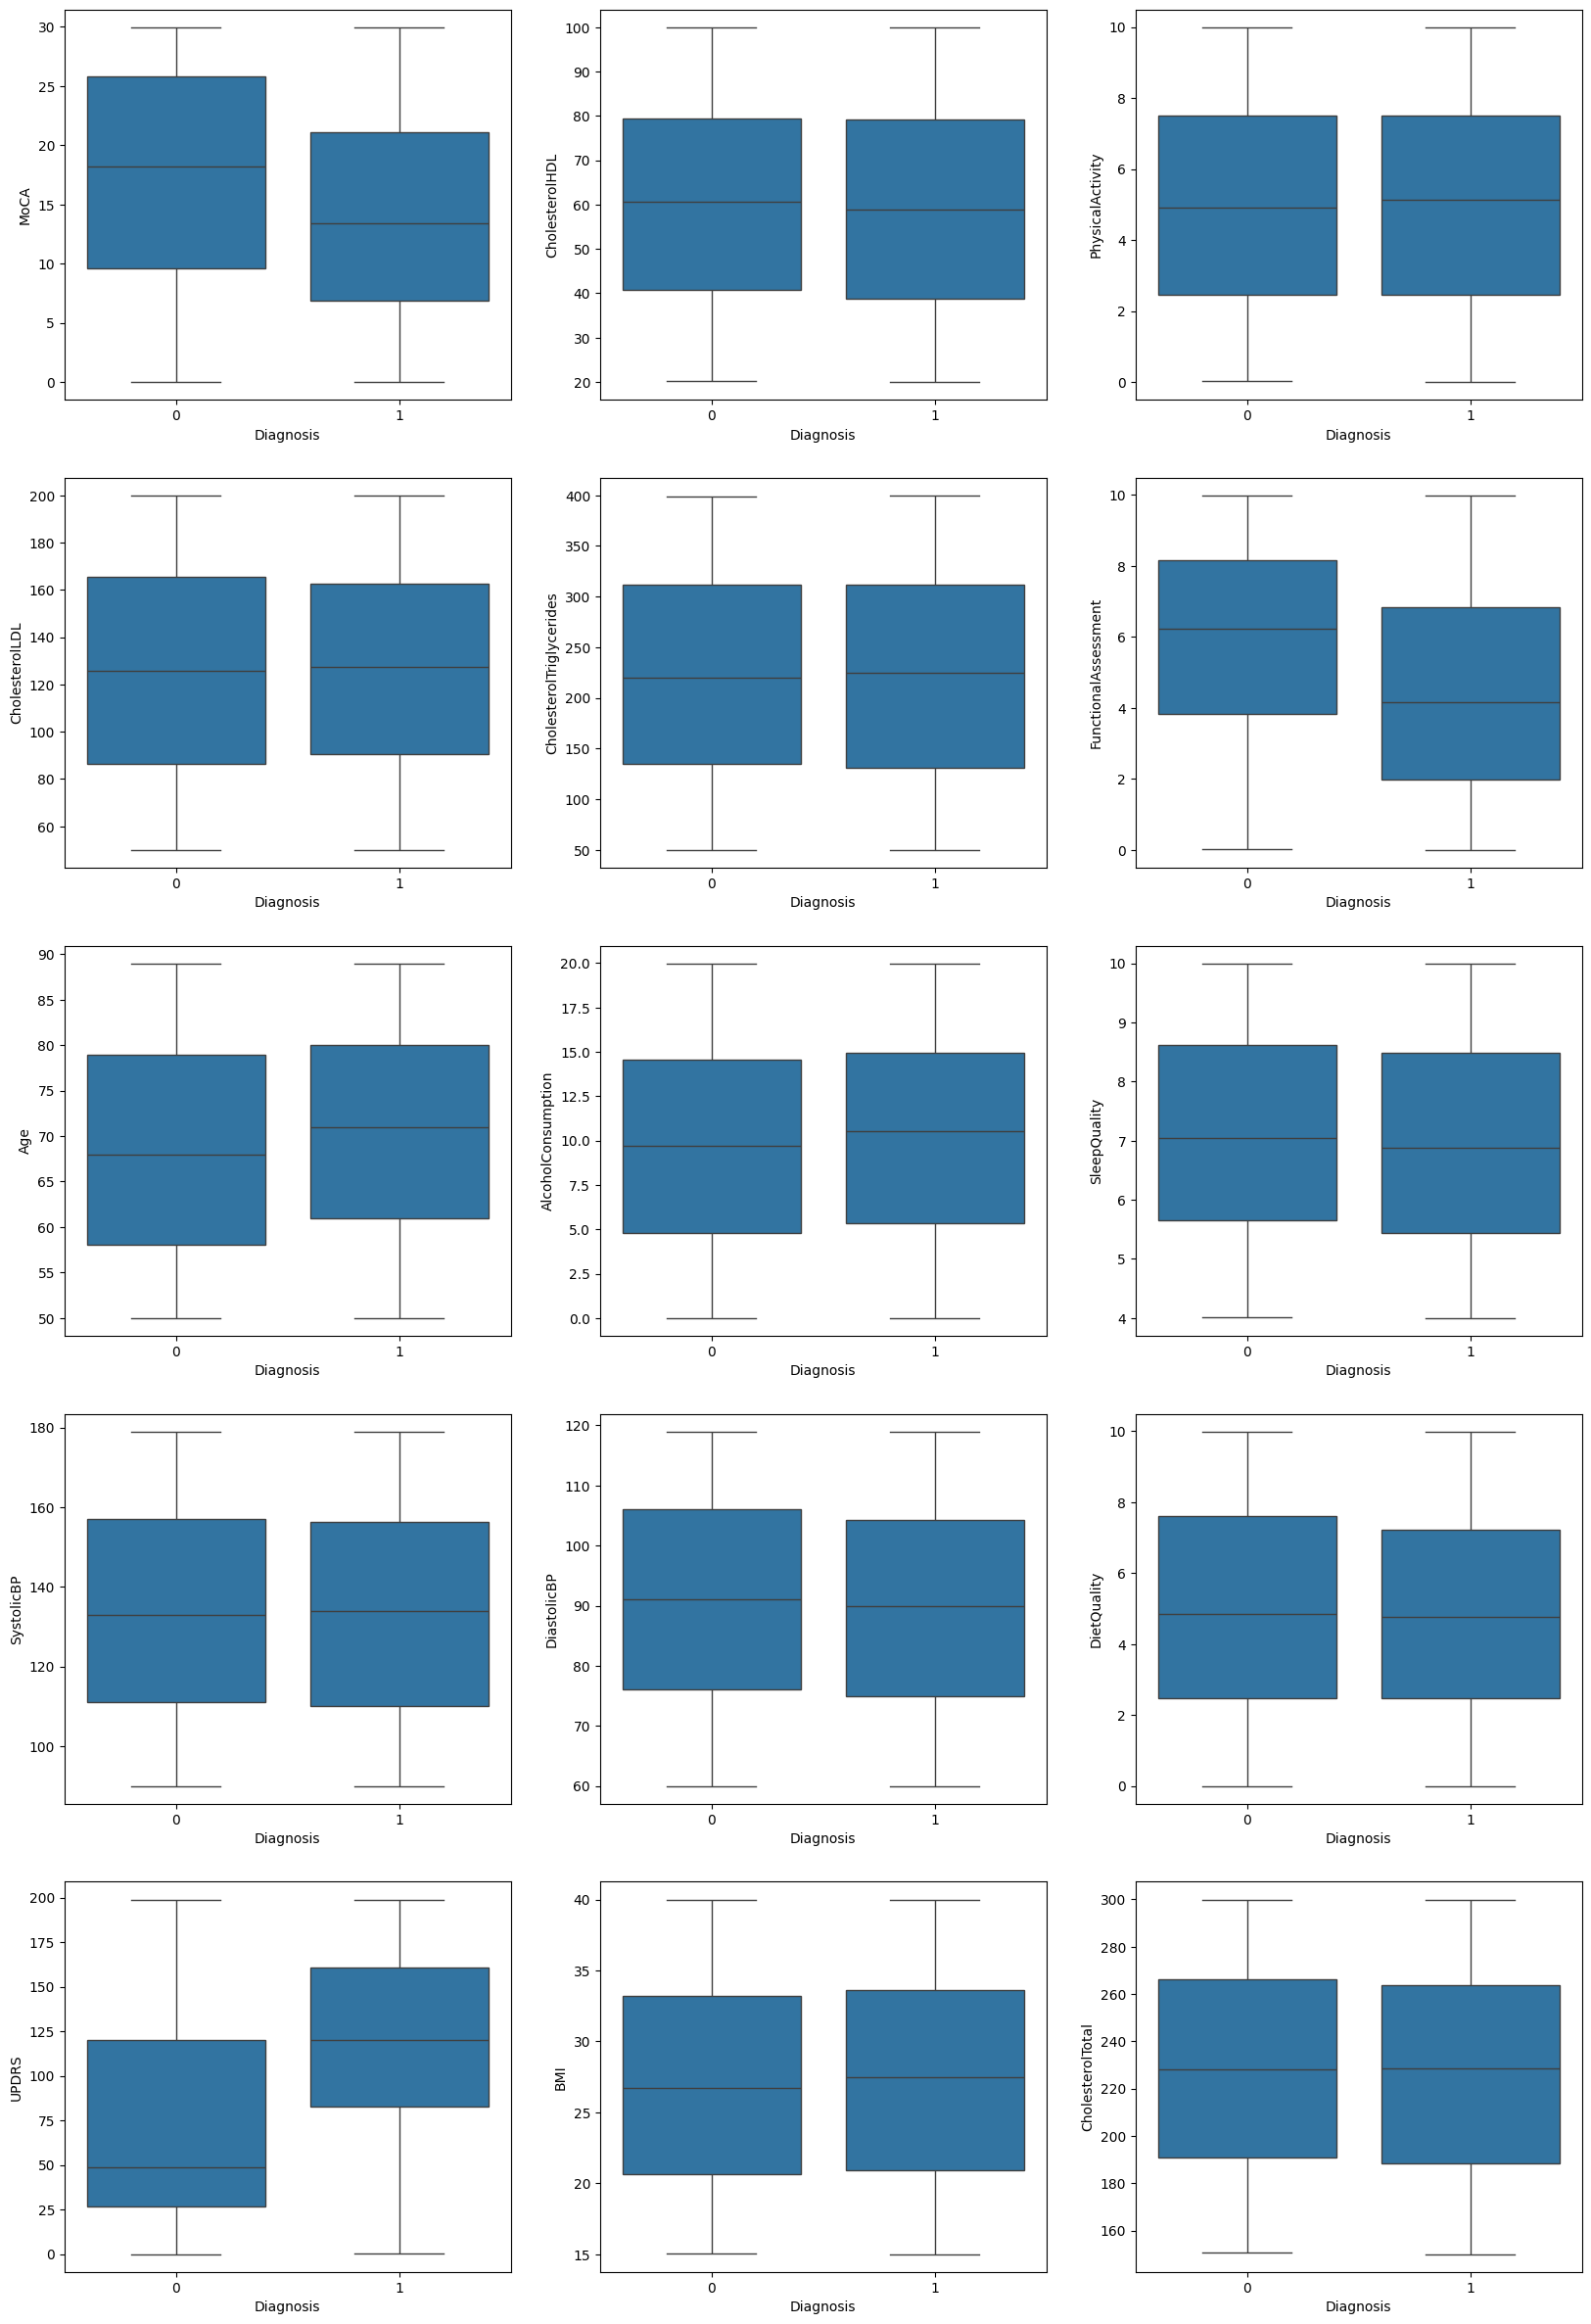

In [14]:
fig, axes = plt.subplots(5, 3, figsize=(20, 30))
axes = axes.flatten()

for i in range(len(numerical_features)):
    sns.boxplot(x='Diagnosis', y=numerical_features[i], data=data, ax=axes[i])

## TASK 4: Normalize dataset

In [15]:
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [16]:
data.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,0.502613,0.492637,0.692637,1.337292,0.488211,0.296437,0.502245,0.501698,0.491493,0.499413,...,0.503294,0.499259,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,0.297295,0.500065,1.003827,0.895840,0.288421,0.456795,0.284541,0.289349,0.287331,0.292210,...,0.288592,0.293646,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.000000,0.000000,1.000000,0.231032,0.000000,0.257575,0.245373,0.247952,0.248089,...,0.250292,0.241651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.512821,0.000000,0.000000,1.000000,0.487214,0.000000,0.503742,0.503187,0.482718,0.488275,...,0.498929,0.498611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.769231,1.000000,1.000000,2.000000,0.738414,1.000000,0.741863,0.751533,0.738454,0.759789,...,0.754190,0.748931,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Dataset normalized!

## Train test split

In [17]:
X = data.drop(['Diagnosis'], axis = 1)
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

## TASK 5.1: kNN

### Train model and make prediction

In [18]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

### Display metrics

In [19]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.56      0.55      0.55       159
           1       0.73      0.74      0.73       262

    accuracy                           0.67       421
   macro avg       0.65      0.64      0.64       421
weighted avg       0.67      0.67      0.67       421



In [20]:
print(confusion_matrix(y_test,knn_pred))

[[ 87  72]
 [ 68 194]]


In [21]:
accuracy = accuracy_score(y_test, knn_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 66.75%


### Find the best n_neighbours value

Best k: 13


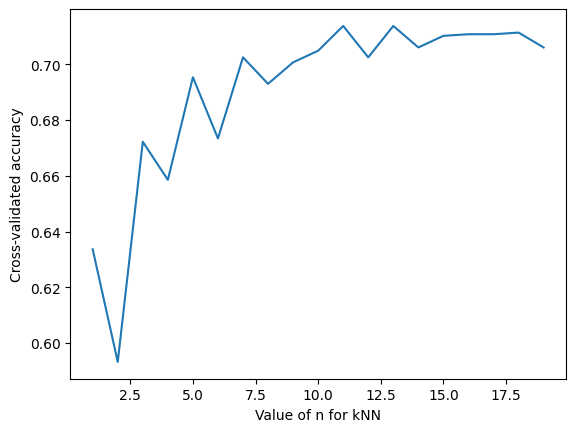

In [22]:
scores = []
n_range = range(1, 20)

for n in n_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    scores.append(np.mean(score))

best_n = n_range[np.argmax(scores)]
print(f"Best k: {best_n}")

plt.plot(n_range, scores)
plt.xlabel('Value of n for kNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

### Train model and make prediction with n = 13

In [23]:
n_neighbors = 13
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

### Display metrics

In [24]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       159
           1       0.77      0.81      0.79       262

    accuracy                           0.73       421
   macro avg       0.71      0.70      0.71       421
weighted avg       0.73      0.73      0.73       421



In [25]:
print(confusion_matrix(y_test,knn_pred))

[[ 94  65]
 [ 49 213]]


In [26]:
accuracy = accuracy_score(y_test, knn_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 72.92%


## TASK 5.2: Decision Tree

### Train model and make prediction

In [27]:
dtc = DecisionTreeClassifier(random_state=1337)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

### Display tree

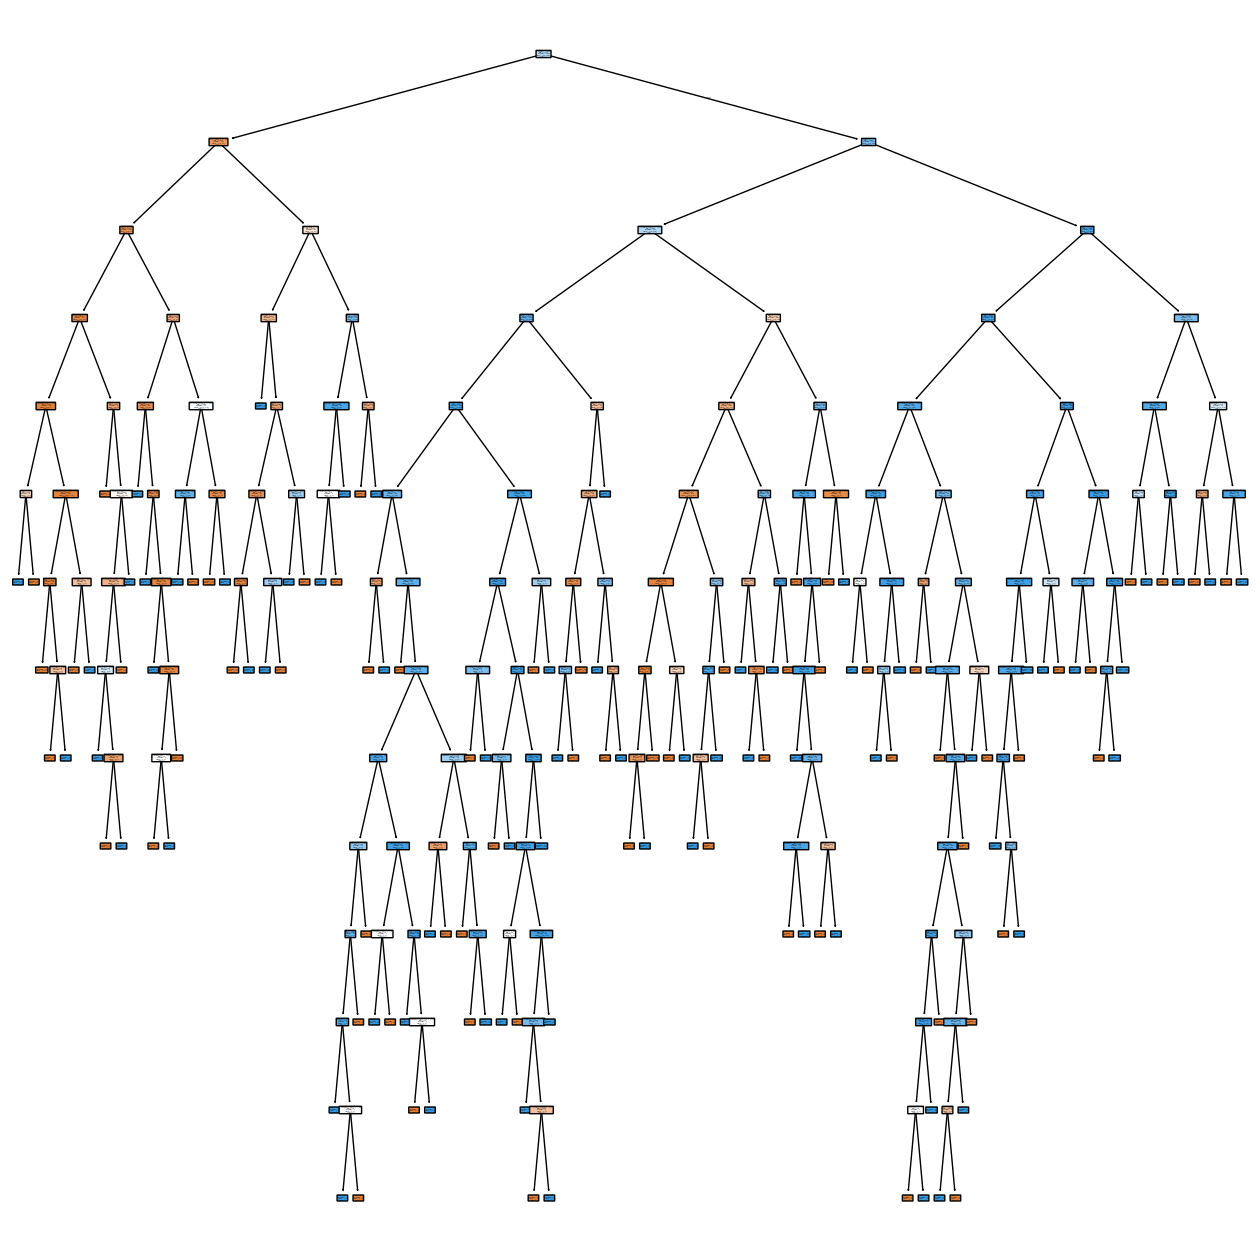

In [28]:
plt.figure(figsize=(16, 16))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.show()

### Display metrics

In [29]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       159
           1       0.90      0.92      0.91       262

    accuracy                           0.88       421
   macro avg       0.88      0.87      0.88       421
weighted avg       0.88      0.88      0.88       421



In [30]:
print(confusion_matrix(y_test,dtc_pred))

[[132  27]
 [ 22 240]]


In [31]:
accuracy = accuracy_score(y_test, dtc_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.36%


### DecisionTreeClassifier tree assessment

Best depth: 7


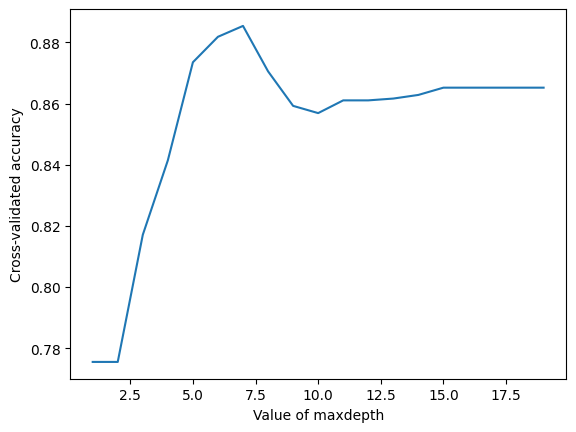

In [32]:
scores = []
depth_range = range(1, 20)

for depth in depth_range:
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=1337)
    score = cross_val_score(dtc, X_train, y_train, cv=5, scoring='accuracy')
    scores.append(np.mean(score))

best_depth = depth_range[np.argmax(scores)]
print(f"Best depth: {best_depth}")

plt.plot(depth_range, scores)
plt.xlabel('Value of maxdepth')
plt.ylabel('Cross-validated accuracy')
plt.show()

### DecisionTreeClassifier with best maxdepth

### Train model and make prediction

In [33]:
dtc = DecisionTreeClassifier(max_depth=7, random_state=1337)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

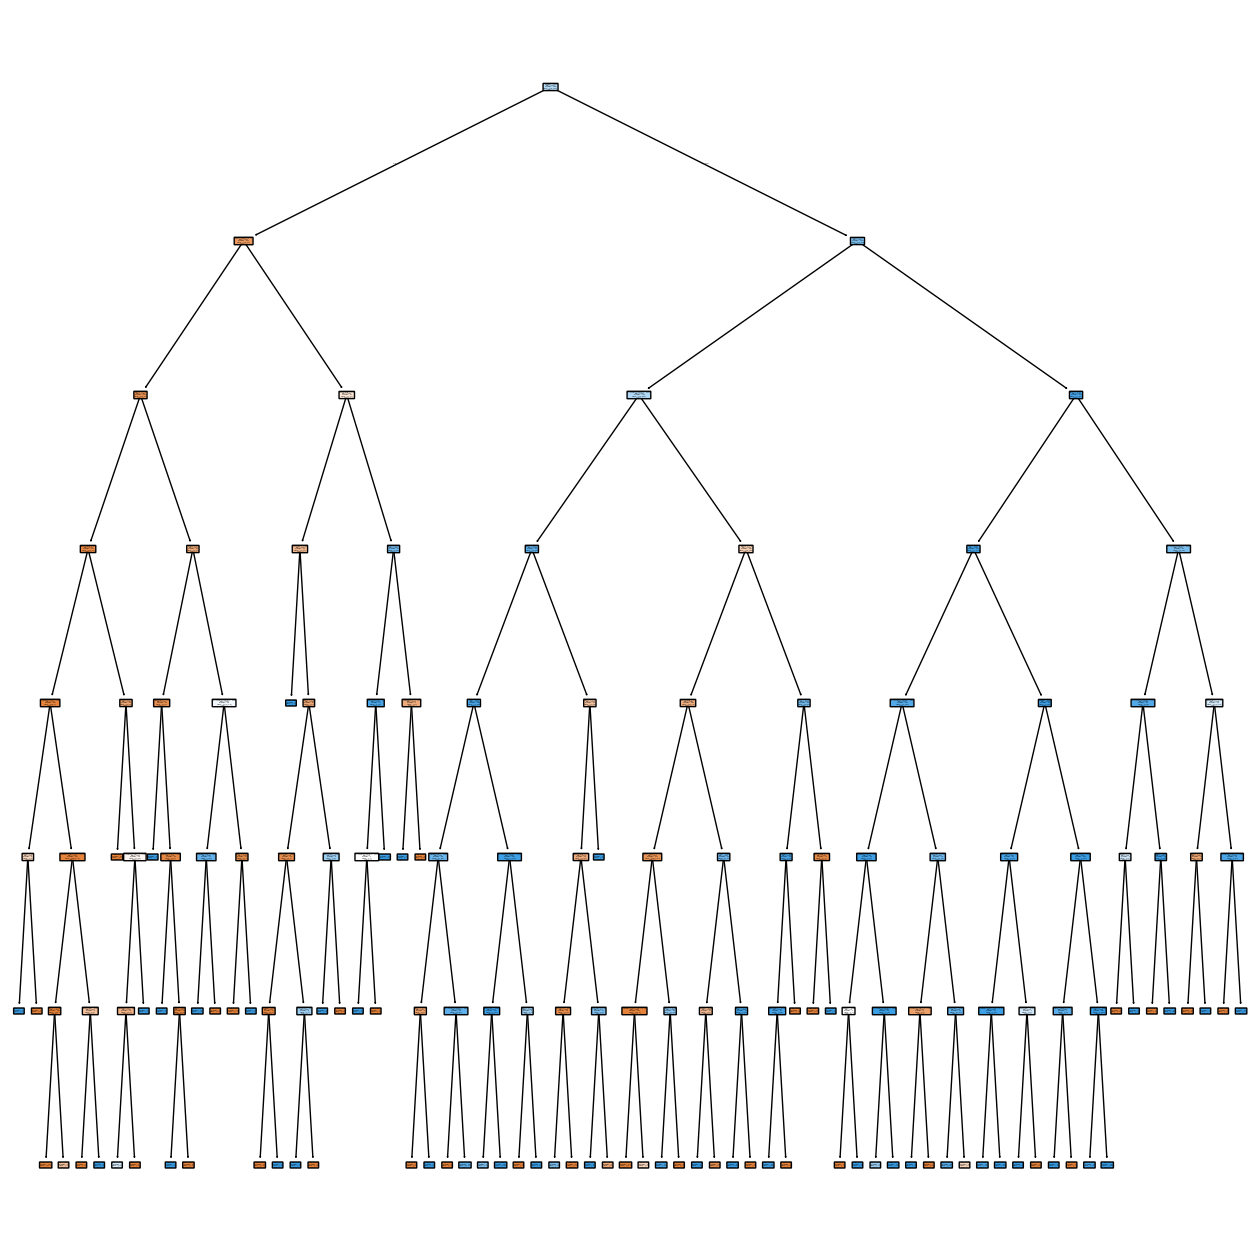

In [34]:
plt.figure(figsize=(16, 16))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.show()

### Display metrics

In [35]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       159
           1       0.90      0.92      0.91       262

    accuracy                           0.88       421
   macro avg       0.88      0.87      0.88       421
weighted avg       0.88      0.88      0.88       421



In [36]:
print(confusion_matrix(y_test, dtc_pred))

[[132  27]
 [ 22 240]]


In [37]:
accuracy = accuracy_score(y_test, dtc_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.36%


## TASK 5.3: Random Forest

### Train model and make predictions

In [38]:
rfc = RandomForestClassifier(n_estimators=100, random_state=1337)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

### Display metrics

In [39]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       159
           1       0.93      0.94      0.94       262

    accuracy                           0.92       421
   macro avg       0.92      0.91      0.91       421
weighted avg       0.92      0.92      0.92       421



In [40]:
print(confusion_matrix(y_test,rfc_pred))

[[140  19]
 [ 15 247]]


In [41]:
accuracy = accuracy_score(y_test, rfc_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.92%


## TASK 5.4: AdaBoost

In [42]:
abc = AdaBoostClassifier(n_estimators=50, random_state=1337, algorithm='SAMME')
abc.fit(X_train, y_train)
abc_pred = abc.predict(X_test)

### Display metrics

In [43]:
print(classification_report(y_test,abc_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       159
           1       0.95      0.96      0.95       262

    accuracy                           0.94       421
   macro avg       0.94      0.94      0.94       421
weighted avg       0.94      0.94      0.94       421



In [44]:
print(confusion_matrix(y_test,abc_pred))

[[145  14]
 [ 10 252]]


In [45]:
accuracy = accuracy_score(y_test, abc_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.30%


## TASK 5.4: SVM

### Train model and make predictions

In [56]:
svm_model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)

### Display metrics

In [60]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.85      0.18      0.30       159
           1       0.66      0.98      0.79       262

    accuracy                           0.68       421
   macro avg       0.76      0.58      0.55       421
weighted avg       0.74      0.68      0.61       421



In [61]:
print(confusion_matrix(y_test,svm_pred))

[[ 29 130]
 [  5 257]]


In [62]:
accuracy = accuracy_score(y_test, svm_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 67.93%


### GridSearch

In [63]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [64]:
grid = GridSearchCV(SVC(), param_grid, refit=True)

In [65]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [66]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [67]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [72]:
grid_pred = grid.predict(X_test)

### Display metrics

In [73]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.75       159
           1       0.83      0.88      0.86       262

    accuracy                           0.82       421
   macro avg       0.81      0.80      0.80       421
weighted avg       0.82      0.82      0.82       421



In [74]:
print(confusion_matrix(y_test,grid_pred))

[[113  46]
 [ 31 231]]


In [75]:
accuracy = accuracy_score(y_test, grid_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.71%


## Conclusion

### Accuracy tier list

1. AdaBoost (94.30%)
2. Random Forest (91.92%)
3. Decision Tree (88.36%)
4. SVM (81.71%)
5. kNN (72.92%)